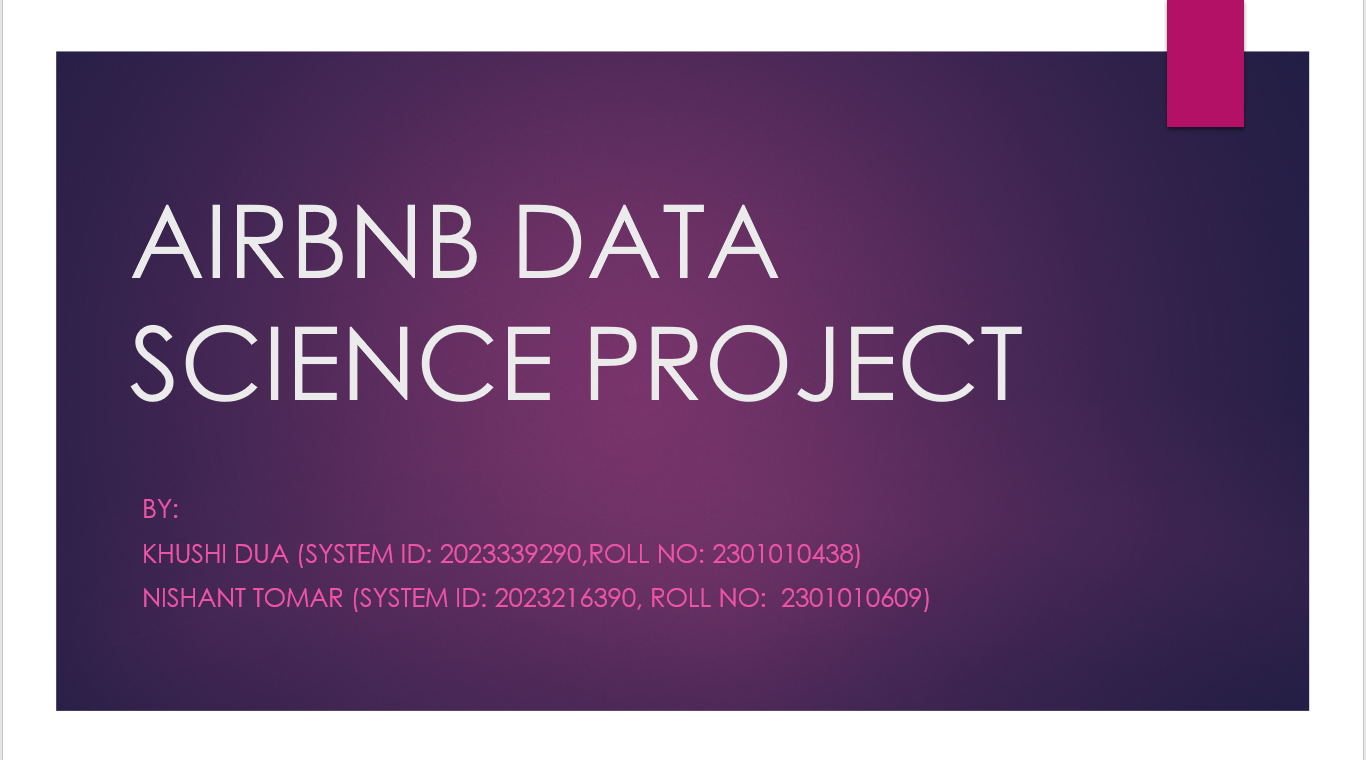

In [ ]:
# Index

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from collections import Counter

In [ ]:
# Importing the listing dataset
listingsDF = pd.read_csv('/content/listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
print("Data type : ", type(listingsDF))
print("Data dims : ", listingsDF.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3818, 92)


# **Data Cleaning**

In [ ]:
# After viewing the multiple columns in the listings.csv from the data_description.txt,
# the following variables were picked for further analysis and dropped variables like date_scraped etc.
listingDF = listingsDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [ ]:
# Replace NaN values with 0
listingDF.fillna(0, inplace=True)

# Extract prices from listingDF into priceDF
priceDF = listingDF['price']
# Create an empty prices list
prices=[]

# Convert prices from listingDF into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)

# Replace the price column in the original listingDF with the new prices
listingDF['price'] = prices

<ipython-input-6-8744da6f6fe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF.fillna(0, inplace=True)
<ipython-input-6-8744da6f6fe0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF['price'] = prices


In [ ]:
# Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


Analyzing the listings based on room types. It is stated in AirBnB's website that they have 3 room types.

Number of room types : 3

room_type
Entire home/apt    1805
Private room        947
Shared room          91
Name: count, dtype: int64


<ipython-input-8-25a9d62d5de5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(x = "room_type", data = listingDF, kind = "count", palette="Set2")


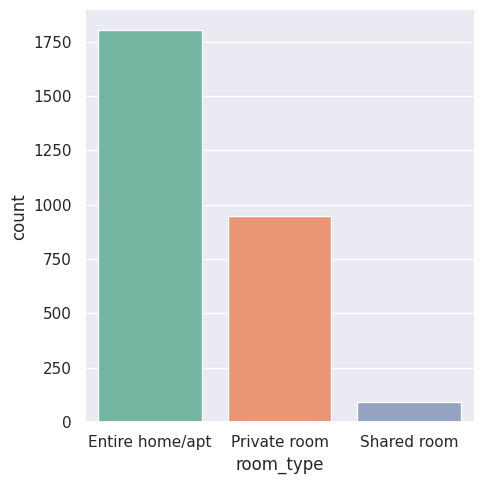

In [ ]:
# Number of room types
print("Number of room types :", len(listingDF["room_type"].unique()))
print()

# Number of listings of each room type
print(listingDF["room_type"].value_counts())
sb.catplot(x = "room_type", data = listingDF, kind = "count", palette="Set2")

As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second and shared rooms being the least.

# Analyzing the listings based on the property type.

Number of property types : 15

property_type
House              1403
Apartment          1194
Townhouse            78
Condominium          68
Bed & Breakfast      26
Loft                 22
Cabin                17
Other                13
Camper/RV             8
Boat                  5
Tent                  4
Bungalow              2
Dorm                  1
Chalet                1
Treehouse             1
Name: count, dtype: int64


<ipython-input-9-a2b5fa0831e7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(x = "property_type", data = listingDF, kind = "count", palette="Set2", height = 8, aspect = 2)


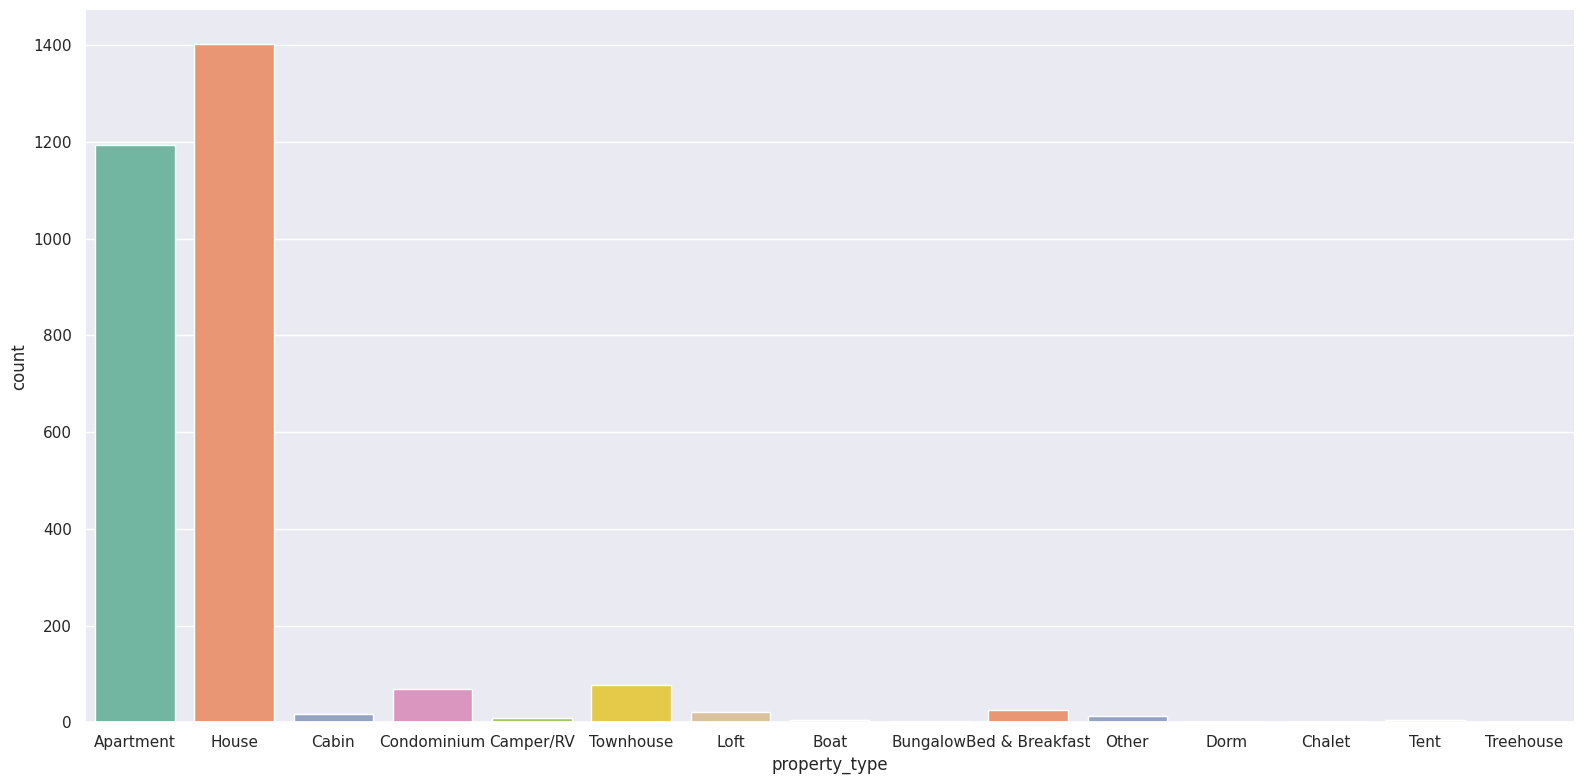

In [ ]:
# Number of property types
print("Number of property types :", len(listingDF["property_type"].unique()))
print()

# Number of listings of each room type
print(listingDF["property_type"].value_counts())
sb.catplot(x = "property_type", data = listingDF, kind = "count", palette="Set2", height = 8, aspect = 2)

From the above graph, we can see that there are a lot more listings of apartment and full houses than any other property type in seattle. Together with the earlier discovery that hosts prefer to list their full property than just a room or shared room, it can be inferred that most listings in Seattle are entire apartments or entire houses. Now lets analyze if these listing types have anything to do with the prices of the listings.

# Analyzing the prices for the different room and property types.

In [ ]:
# Checking out the mean prices for the different room and property types
roomProperty_DF = listingDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
6,Boat,Entire home/apt,513.333333
19,House,Entire home/apt,194.824859
29,Townhouse,Entire home/apt,189.818182
22,Loft,Entire home/apt,178.933333
15,Condominium,Entire home/apt,170.490566


<Axes: xlabel='room_type', ylabel='property_type'>

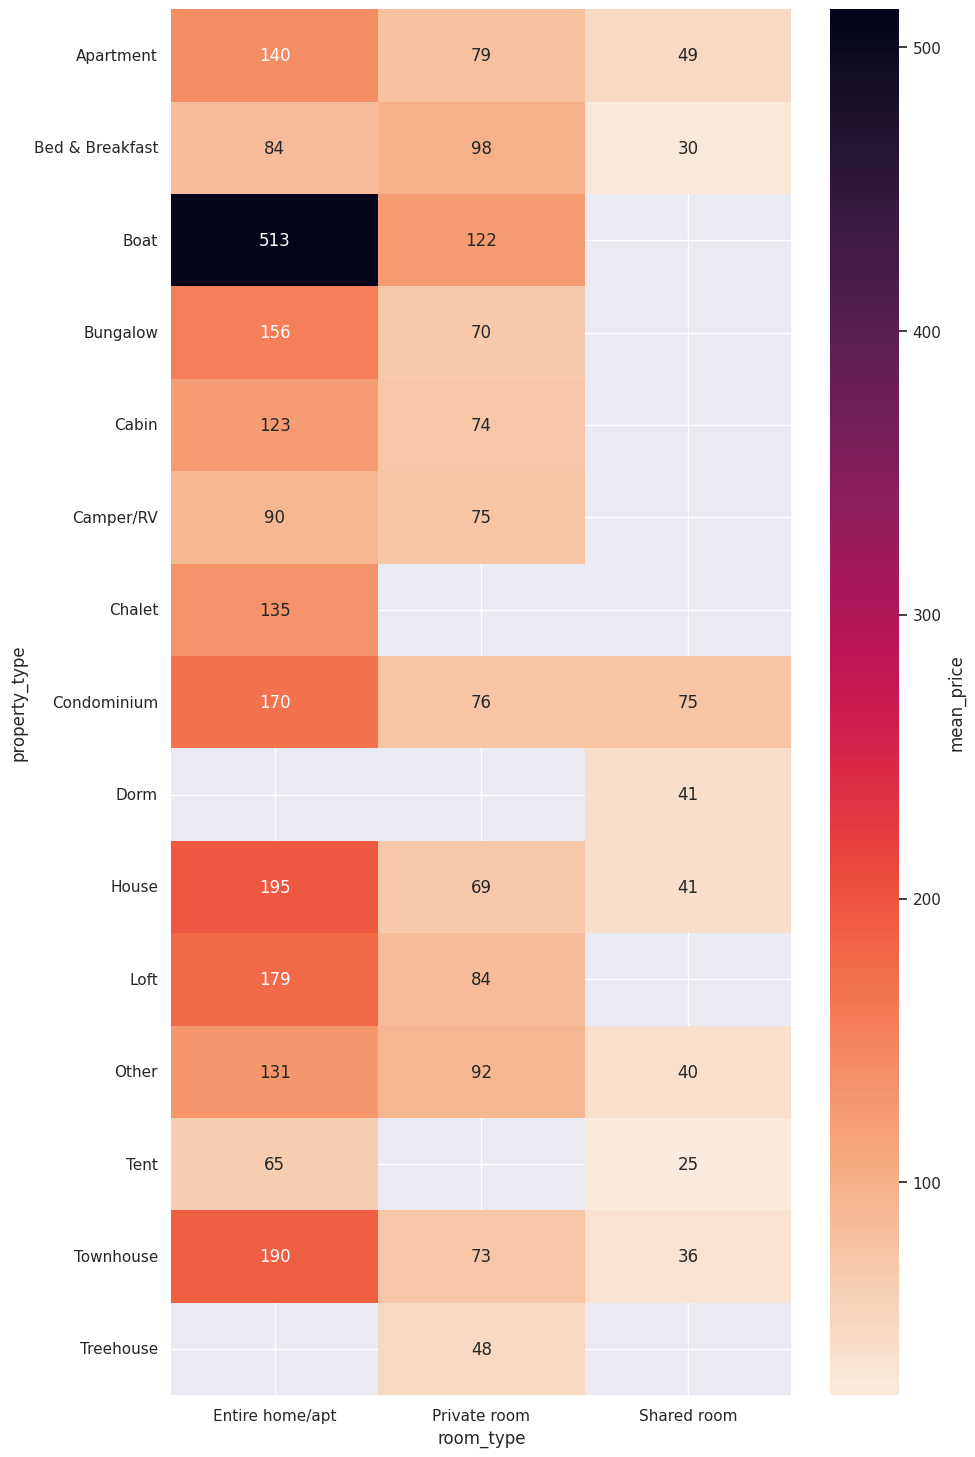

In [ ]:
# Plotting a heatmap of the mean price for room type and a property type

plt.figure(figsize = (10,18))
sb.heatmap(listingDF.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})

From the above heatmap, with lighter colour representing lower price and darker representing higher price, we can see that shared rooms have the lighest colour hence cheapest. Private rooms have a slightly darker colour so they are in the middle, and entire houses are the darkest thus the most expensive.

It is also important to note that the highest number of listings which was house and apartments actually have very similar prices for each of the room_type category.

All of this tells us that the room_type and property_type both play a very important role in the final price of the listing

# Analyzing the listings based on the number of bedrooms.

<Axes: xlabel='bedrooms', ylabel='price'>

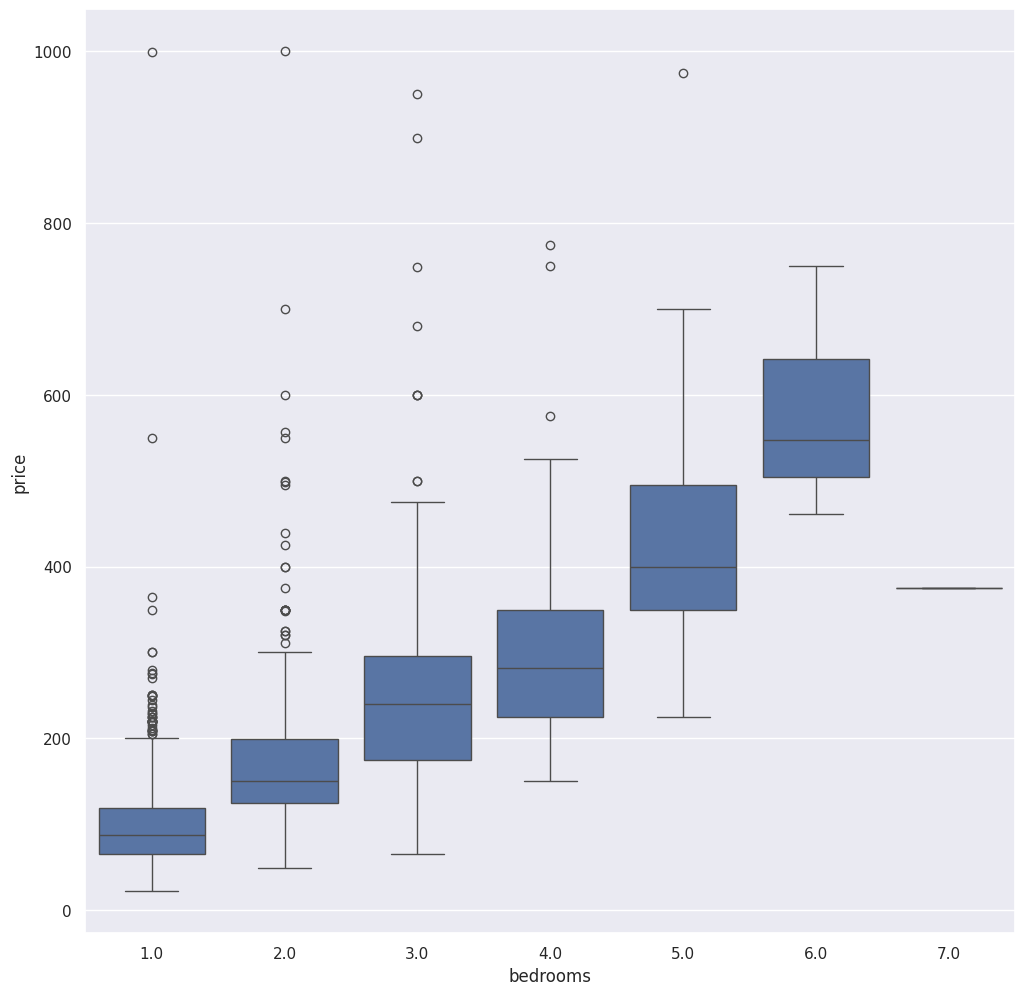

In [ ]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sb.boxplot(x='bedrooms', y='price', data=listingDF[['bedrooms', 'price']])

The boxplots above show that indeed there is a trend between bedrooms and price. So, we should anaylse the no. bedrooms further with the property type.

In [ ]:
# Creating a number of rooms vs property type dataframe
noRoomDF = listingDF[['property_type', 'bedrooms']]
noRoomDF.head(n=15)

,property_type,bedrooms
0,Apartment,1.0
1,Apartment,1.0
2,House,5.0
4,House,3.0
5,House,1.0
6,House,1.0
7,Cabin,1.0
8,Apartment,1.0
9,Apartment,1.0
10,House,1.0


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be plac

<Axes: xlabel='bedrooms', ylabel='property_type'>

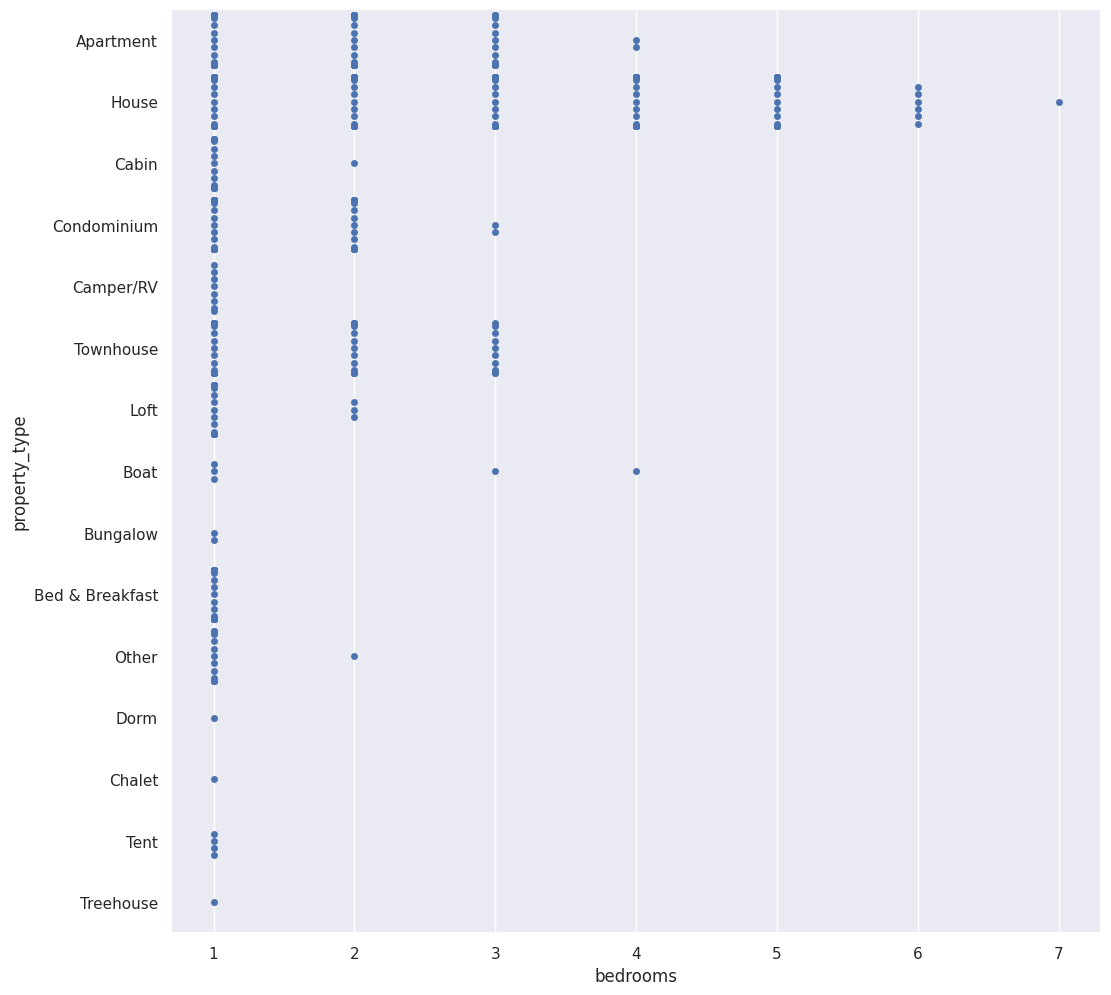

In [ ]:
# Plotting a swarmplot to visually see the number of listings for each room_type and the no. bedrooms
plt.figure(figsize=(12,12))
sb.swarmplot(x='bedrooms', y='property_type', data=noRoomDF)

From the above swarmplot, we can see that generally, the number of listings decreases with higher no. of bedrooms. Additionally, only apartments and houses have more than 3 bedrooms with the exception of the boat house. We will now see the prices of these 2 variables plotted in a single heatmap.

<Axes: xlabel='bedrooms', ylabel='property_type'>

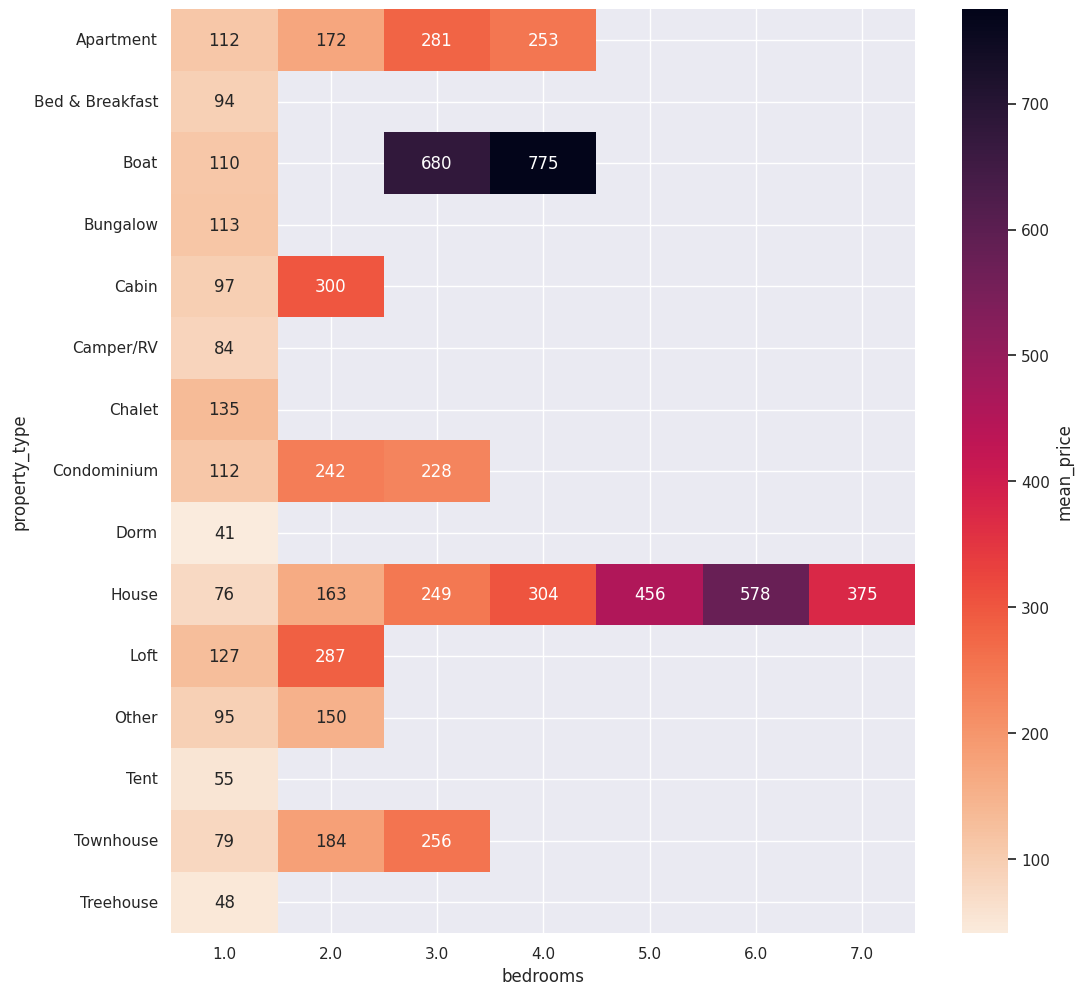

In [ ]:
# Plotting a heatmap of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sb.heatmap(listingDF.groupby(['property_type', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})

From the table above, we can see that there was only 1 listing with 7 bedrooms. So, it can be seen as an exception (anomaly). So, the general trend is true, price of listing increases with no. bedrooms.

So far, we can see that room type, property type and number of bedrooms have some effect on the price of a listing. We will now analyse if any specific ammenity in the property results in higher prices.

#Analyzing if any particular ammenity results in higher prices.
We are going to analyze the textual data of ammenities by finding the words that appear most frequently in ammenities in the most expensive listings.

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = listingDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk
from nltk.corpus import stopwords
import re
from IPython.display import display

# Download the necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# Download the stopwords resource if not already present
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Download the wordnet resource if not already present
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# Download the omw-1.4 resource if not already present (often needed for WordNetLemmatizer)
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')


# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = listingDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


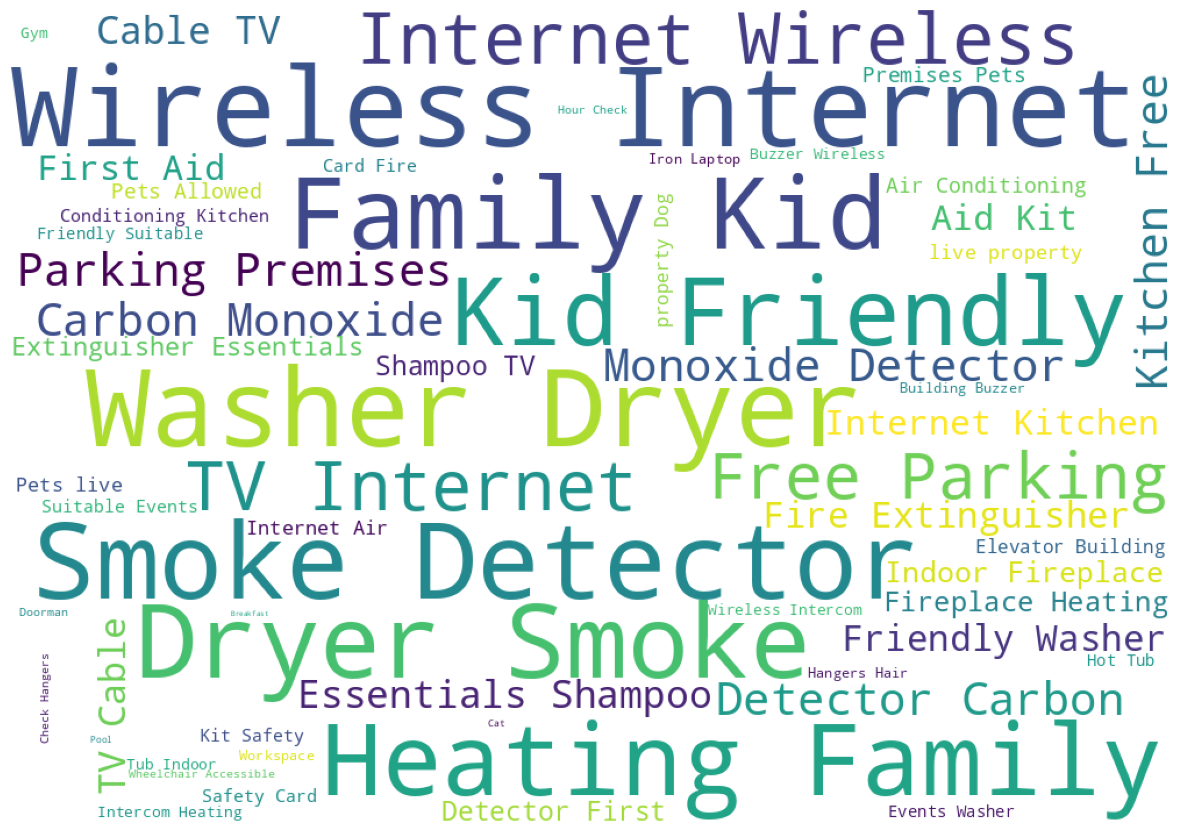

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the above wordcloud, we can see that the listings with the highest prices have ammenities such as 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly'. These ammenities will be further explored in depth in the machine learning parts of the project.

From all the analysis above, we can say a few things:

Type of room for the listing has a great influence in the price. Most hosts list their entire property. Moreover, entire property lisitings cost the most.

The type of property also influences price. Although the highest price is fetched by boat houses, there are very few of them. The most common properties are houses and apartments since these are the 2 types of properties that most hosts list and they do fetch a high price provided the entire property is listed as mentioned in (1).

The number of bedrooms in the listing also has a general trend with the price of the listing. The more rooms available, the higher the price of the listing.

Finally, there are certain ammenities such as: 'Dryer', 'Washer', 'Kid Friendly', 'Heating', 'Free Parking' etc. that most expensive listings also provide. The ammenities will be further explored in the machine learning parts of the project.

